In [25]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from scipy.misc import toimage

In [26]:
#Load Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize Inputs From 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Encoded Outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

num = []
for i in range(30):
    num.append(i+1)
    
num = np.asarray(num)

In [62]:
def RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test,decayvalue=0):
    
    training_accuracy = []
    testing_accuracy = []
    training_loss = []
    testing_loss = []
    
    #Model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #RMSprop Tuning
    rmsprop = optimizers.RMSprop(lr=lrate,rho=rhovalue,epsilon=epsilonvalue,decay=decayvalue)
    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    
    #Training and Fitting
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
    scores = model.evaluate(X_test, y_test, verbose=0)
    acc = print("Accuracy: %.2f%%" % (scores[1]*100))
    training_accuracy.append(history.history['acc'])
    testing_accuracy.append(history.history['val_acc'])
    training_loss.append(history.history['loss'])
    testing_loss.append(history.history['val_loss'])
    
    return training_accuracy,testing_accuracy,training_loss,testing_loss


In [28]:
tr_acc_main = []
ts_acc_main = []
tr_ls_main = []
ts_ls_main = []
learningrates = [0.0005,0.0001,0.00005,0.00001]

for lrate in learningrates:
    rhovalue = 0.9
    epsilonvalue = 1e-7
    epochs = 30
    tr_acc,ts_acc,tr_ls,ts_ls = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)
    tr_acc_main.append(tr_acc)
    ts_acc_main.append(ts_acc)
    tr_ls_main.append(tr_ls)
    ts_ls_main.append(ts_ls)    

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s - loss: 1.6300 - acc: 0.4060 - val_loss: 1.3491 - val_acc: 0.5143
Epoch 2/30
50000/50000 [==============================] - 11s - loss: 1.1799 - acc: 0.5824 - val_loss: 1.0253 - val_acc: 0.6437
Epoch 3/30
50000/50000 [==============================] - 11s - loss: 0.9820 - acc: 0.6599 - val_loss: 0.9277 - val_acc: 0.6821
Epoch 4/30
50000/50000 [==============================] - 11s - loss: 0.8952 - acc: 0.6955 - val_loss: 0.7949 - val_acc: 0.7315
Epoch 5/30
50000/50000 [==============================] - 11s - loss: 0.8651 - acc: 0.7097 - val_loss: 0.8132 - val_acc: 0.7339
Epoch 6/30
50000/50000 [==============================] - 11s - loss: 0.8553 - acc: 0.7167 - val_loss: 0.7781 - val_acc: 0.7505
Epoch 7/30
50000/50000 [==============================] - 11s - loss: 0.8601 - acc: 0.7174 - val_loss: 0.8782 - val_acc: 0.7146
Epoch 8/30
50000/50000 [==============================

50000/50000 [==============================] - 11s - loss: 1.4978 - acc: 0.4551 - val_loss: 1.8455 - val_acc: 0.3568
Epoch 4/30
50000/50000 [==============================] - 11s - loss: 1.4024 - acc: 0.4899 - val_loss: 1.5664 - val_acc: 0.4321
Epoch 5/30
50000/50000 [==============================] - 11s - loss: 1.3176 - acc: 0.5264 - val_loss: 1.3694 - val_acc: 0.5168
Epoch 6/30
50000/50000 [==============================] - 11s - loss: 1.2467 - acc: 0.5543 - val_loss: 1.3048 - val_acc: 0.5285
Epoch 7/30
50000/50000 [==============================] - 11s - loss: 1.1864 - acc: 0.5759 - val_loss: 1.2529 - val_acc: 0.5502
Epoch 8/30
50000/50000 [==============================] - 11s - loss: 1.1292 - acc: 0.5950 - val_loss: 1.1465 - val_acc: 0.5991
Epoch 9/30
50000/50000 [==============================] - 11s - loss: 1.0811 - acc: 0.6151 - val_loss: 1.1310 - val_acc: 0.5906
Epoch 10/30
50000/50000 [==============================] - 11s - loss: 1.0369 - acc: 0.6340 - val_loss: 1.0566 - va

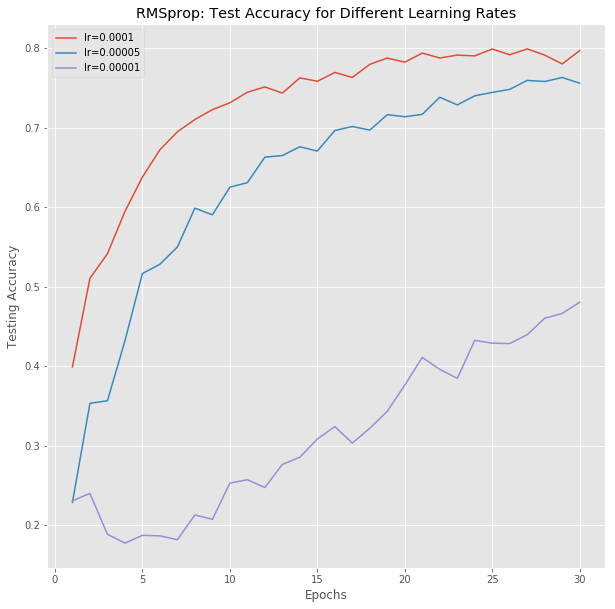

In [32]:
#Plotting Testing Accuracy for different Learning Rates

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("RMSprop: Test Accuracy for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")
#plt.plot(num,np.array(ts_acc_main[0]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_acc_main[1]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_acc_main[2]).T,mfc='b',label="lr=0.00005")
plt.plot(num,np.array(ts_acc_main[3]).T,mfc='b',label="lr=0.00001")
plt.legend(loc="best")

plt.show()

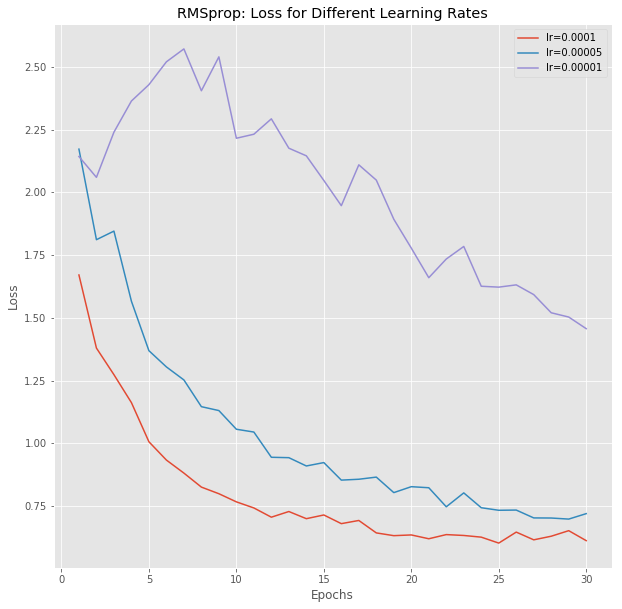

In [33]:
#Plotting Testing Loss for Different Learning Rates

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("RMSprop: Loss for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.plot(num,np.array(ts_ls_main[0]).T,mfc='b',label="lr=0.0005")
plt.plot(num,np.array(ts_ls_main[1]).T,mfc='b',label="lr=0.0001")
plt.plot(num,np.array(ts_ls_main[2]).T,mfc='b',label="lr=0.00005")
plt.plot(num,np.array(ts_ls_main[3]).T,mfc='b',label="lr=0.00001")
plt.legend(loc="best")

plt.show()

In [46]:
tr_acc_main1 = []
ts_acc_main1 = []
tr_ls_main1 = []
ts_ls_main1 = []
learningrates = [0.0001,0.00005]
rhovalues = [0.8,0.9,0.95,0.975,0.98,0.99]

for lrate in learningrates:
    for rhovalue in rhovalues:
    
        epsilonvalue = 1e-7
        epochs = 30
        tr_acc,ts_acc,tr_ls,ts_ls = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)
        tr_acc_main1.append(tr_acc)
        ts_acc_main1.append(ts_acc)
        tr_ls_main1.append(tr_ls)
        ts_ls_main1.append(ts_ls)    

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 12s - loss: 1.8780 - acc: 0.3126 - val_loss: 1.6560 - val_acc: 0.4033
Epoch 2/30
50000/50000 [==============================] - 11s - loss: 1.5127 - acc: 0.4516 - val_loss: 1.4154 - val_acc: 0.4914
Epoch 3/30
50000/50000 [==============================] - 11s - loss: 1.3227 - acc: 0.5220 - val_loss: 1.2032 - val_acc: 0.5766
Epoch 4/30
50000/50000 [==============================] - 11s - loss: 1.1933 - acc: 0.5743 - val_loss: 1.2566 - val_acc: 0.5481
Epoch 5/30
50000/50000 [==============================] - 11s - loss: 1.0853 - acc: 0.6150 - val_loss: 1.0337 - val_acc: 0.6295
Epoch 6/30
50000/50000 [==============================] - 11s - loss: 1.0077 - acc: 0.6438 - val_loss: 1.0083 - val_acc: 0.6404
Epoch 7/30
50000/50000 [==============================] - 11s - loss: 0.9399 - acc: 0.6703 - val_loss: 0.9624 - val_acc: 0.6577
Epoch 8/30
50000/50000 [==============================

50000/50000 [==============================] - 11s - loss: 1.3090 - acc: 0.5276 - val_loss: 1.2391 - val_acc: 0.5648
Epoch 4/30
50000/50000 [==============================] - 11s - loss: 1.1808 - acc: 0.5771 - val_loss: 1.1630 - val_acc: 0.5816
Epoch 5/30
50000/50000 [==============================] - 11s - loss: 1.0757 - acc: 0.6165 - val_loss: 0.9951 - val_acc: 0.6453
Epoch 6/30
50000/50000 [==============================] - 11s - loss: 0.9892 - acc: 0.6489 - val_loss: 0.9548 - val_acc: 0.6650
Epoch 7/30
50000/50000 [==============================] - 11s - loss: 0.9144 - acc: 0.6780 - val_loss: 0.9293 - val_acc: 0.6703
Epoch 8/30
50000/50000 [==============================] - 12s - loss: 0.8503 - acc: 0.7019 - val_loss: 0.8424 - val_acc: 0.7024
Epoch 9/30
50000/50000 [==============================] - 11s - loss: 0.7874 - acc: 0.7220 - val_loss: 0.8586 - val_acc: 0.6969
Epoch 10/30
50000/50000 [==============================] - 11s - loss: 0.7410 - acc: 0.7400 - val_loss: 0.8116 - va

50000/50000 [==============================] - 12s - loss: 1.0294 - acc: 0.6335 - val_loss: 0.9711 - val_acc: 0.6618
Epoch 6/30
50000/50000 [==============================] - 12s - loss: 0.9357 - acc: 0.6686 - val_loss: 0.8744 - val_acc: 0.6907
Epoch 7/30
50000/50000 [==============================] - 12s - loss: 0.8581 - acc: 0.6988 - val_loss: 0.9382 - val_acc: 0.6763
Epoch 8/30
50000/50000 [==============================] - 12s - loss: 0.7922 - acc: 0.7202 - val_loss: 0.8175 - val_acc: 0.7124
Epoch 9/30
50000/50000 [==============================] - 12s - loss: 0.7344 - acc: 0.7401 - val_loss: 0.7847 - val_acc: 0.7230
Epoch 10/30
50000/50000 [==============================] - 12s - loss: 0.6844 - acc: 0.7586 - val_loss: 0.7459 - val_acc: 0.7419
Epoch 11/30
50000/50000 [==============================] - 12s - loss: 0.6346 - acc: 0.7771 - val_loss: 0.7132 - val_acc: 0.7544
Epoch 12/30
50000/50000 [==============================] - 12s - loss: 0.5880 - acc: 0.7936 - val_loss: 0.6697 - 

50000/50000 [==============================] - 12s - loss: 1.2122 - acc: 0.5663 - val_loss: 1.2787 - val_acc: 0.5376
Epoch 8/30
50000/50000 [==============================] - 12s - loss: 1.1610 - acc: 0.5846 - val_loss: 1.2282 - val_acc: 0.5613
Epoch 9/30
50000/50000 [==============================] - 12s - loss: 1.1123 - acc: 0.6019 - val_loss: 1.1053 - val_acc: 0.6061
Epoch 10/30
50000/50000 [==============================] - 12s - loss: 1.0699 - acc: 0.6158 - val_loss: 1.0815 - val_acc: 0.6129
Epoch 11/30
50000/50000 [==============================] - 12s - loss: 1.0300 - acc: 0.6330 - val_loss: 1.0152 - val_acc: 0.6401
Epoch 12/30
50000/50000 [==============================] - 12s - loss: 0.9893 - acc: 0.6513 - val_loss: 0.9810 - val_acc: 0.6546
Epoch 13/30
50000/50000 [==============================] - 12s - loss: 0.9535 - acc: 0.6630 - val_loss: 0.9587 - val_acc: 0.6652
Epoch 14/30
50000/50000 [==============================] - 12s - loss: 0.9245 - acc: 0.6757 - val_loss: 0.9506 

50000/50000 [==============================] - 12s - loss: 1.0934 - acc: 0.6108 - val_loss: 1.0891 - val_acc: 0.6152
Epoch 10/30
50000/50000 [==============================] - 12s - loss: 1.0448 - acc: 0.6267 - val_loss: 1.0690 - val_acc: 0.6229
Epoch 11/30
50000/50000 [==============================] - 12s - loss: 1.0026 - acc: 0.6444 - val_loss: 1.0209 - val_acc: 0.6405
Epoch 12/30
50000/50000 [==============================] - 12s - loss: 0.9661 - acc: 0.6612 - val_loss: 0.9582 - val_acc: 0.6617
Epoch 13/30
50000/50000 [==============================] - 12s - loss: 0.9212 - acc: 0.6751 - val_loss: 0.9378 - val_acc: 0.6723
Epoch 14/30
50000/50000 [==============================] - 12s - loss: 0.8894 - acc: 0.6870 - val_loss: 0.9118 - val_acc: 0.6832
Epoch 15/30
50000/50000 [==============================] - 12s - loss: 0.8561 - acc: 0.6981 - val_loss: 0.8718 - val_acc: 0.6967
Epoch 16/30
50000/50000 [==============================] - 12s - loss: 0.8274 - acc: 0.7089 - val_loss: 0.891

50000/50000 [==============================] - 12s - loss: 0.9172 - acc: 0.6766 - val_loss: 0.8926 - val_acc: 0.6803
Epoch 12/30
50000/50000 [==============================] - 12s - loss: 0.8752 - acc: 0.6921 - val_loss: 0.9150 - val_acc: 0.6740
Epoch 13/30
50000/50000 [==============================] - 12s - loss: 0.8425 - acc: 0.7041 - val_loss: 0.8569 - val_acc: 0.6972
Epoch 14/30
50000/50000 [==============================] - 12s - loss: 0.8063 - acc: 0.7171 - val_loss: 0.8506 - val_acc: 0.6975
Epoch 15/30
50000/50000 [==============================] - 12s - loss: 0.7779 - acc: 0.7280 - val_loss: 0.7870 - val_acc: 0.7240
Epoch 16/30
50000/50000 [==============================] - 12s - loss: 0.7440 - acc: 0.7403 - val_loss: 0.7672 - val_acc: 0.7304
Epoch 17/30
50000/50000 [==============================] - 12s - loss: 0.7186 - acc: 0.7473 - val_loss: 0.7574 - val_acc: 0.7353
Epoch 18/30
50000/50000 [==============================] - 12s - loss: 0.6886 - acc: 0.7570 - val_loss: 0.757

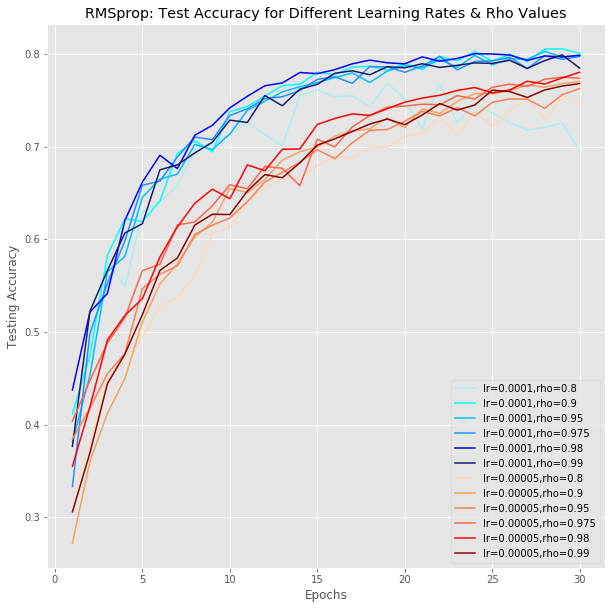

In [47]:
#Plotting Testing Accuracy for Learning Rates (=0.0001 & 0.00005) vs. Rho

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("RMSprop: Test Accuracy for Different Learning Rates & Rho Values")
plt.xlabel("Epochs")
plt.ylabel("Testing Accuracy")


plt.plot(num,np.array(ts_acc_main1[0]).T,mfc='b',label="lr=0.0001,rho=0.8",color='paleturquoise')
plt.plot(num,np.array(ts_acc_main1[1]).T,mfc='b',label="lr=0.0001,rho=0.9",color='cyan')
plt.plot(num,np.array(ts_acc_main1[2]).T,mfc='b',label="lr=0.0001,rho=0.95",color='deepskyblue')
plt.plot(num,np.array(ts_acc_main1[3]).T,mfc='b',label="lr=0.0001,rho=0.975",color='dodgerblue')
plt.plot(num,np.array(ts_acc_main1[4]).T,mfc='b',label="lr=0.0001,rho=0.98",color='b')
plt.plot(num,np.array(ts_acc_main1[5]).T,mfc='b',label="lr=0.0001,rho=0.99",color='midnightblue')
plt.plot(num,np.array(ts_acc_main1[6]).T,mfc='b',label="lr=0.00005,rho=0.8",color='peachpuff')
plt.plot(num,np.array(ts_acc_main1[7]).T,mfc='b',label="lr=0.00005,rho=0.9",color='sandybrown')
plt.plot(num,np.array(ts_acc_main1[8]).T,mfc='b',label="lr=0.00005,rho=0.95",color='coral')
plt.plot(num,np.array(ts_acc_main1[9]).T,mfc='b',label="lr=0.00005,rho=0.975",color='tomato')
plt.plot(num,np.array(ts_acc_main1[10]).T,mfc='b',label="lr=0.00005,rho=0.98",color='r')
plt.plot(num,np.array(ts_acc_main1[11]).T,mfc='b',label="lr=0.00005,rho=0.99",color='darkred')
plt.legend(loc="best")

plt.show()

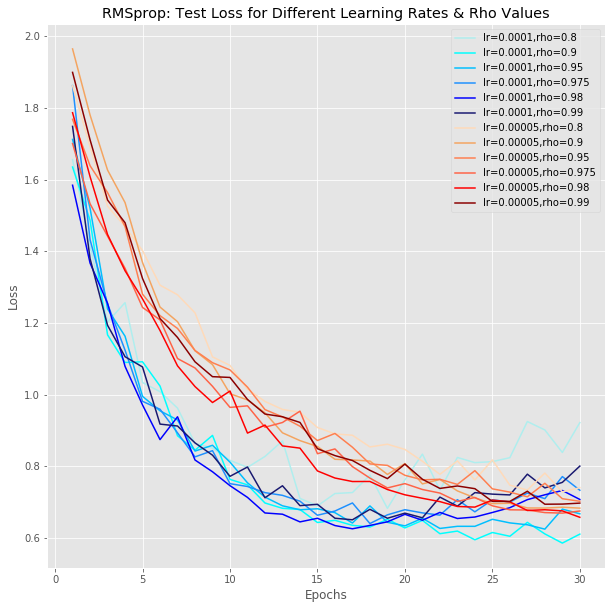

In [49]:
#Plotting Testing Loss for Learning Rates (=0.0001 & 0.00005) vs. Rho

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("RMSprop: Test Loss for Different Learning Rates & Rho Values")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(num,np.array(ts_ls_main1[0]).T,mfc='b',label="lr=0.0001,rho=0.8",color='paleturquoise')
plt.plot(num,np.array(ts_ls_main1[1]).T,mfc='b',label="lr=0.0001,rho=0.9",color='cyan')
plt.plot(num,np.array(ts_ls_main1[2]).T,mfc='b',label="lr=0.0001,rho=0.95",color='deepskyblue')
plt.plot(num,np.array(ts_ls_main1[3]).T,mfc='b',label="lr=0.0001,rho=0.975",color='dodgerblue')
plt.plot(num,np.array(ts_ls_main1[4]).T,mfc='b',label="lr=0.0001,rho=0.98",color='b')
plt.plot(num,np.array(ts_ls_main1[5]).T,mfc='b',label="lr=0.0001,rho=0.99",color='midnightblue')
plt.plot(num,np.array(ts_ls_main1[6]).T,mfc='b',label="lr=0.00005,rho=0.8",color='peachpuff')
plt.plot(num,np.array(ts_ls_main1[7]).T,mfc='b',label="lr=0.00005,rho=0.9",color='sandybrown')
plt.plot(num,np.array(ts_ls_main1[8]).T,mfc='b',label="lr=0.00005,rho=0.95",color='coral')
plt.plot(num,np.array(ts_ls_main1[9]).T,mfc='b',label="lr=0.00005,rho=0.975",color='tomato')
plt.plot(num,np.array(ts_ls_main1[10]).T,mfc='b',label="lr=0.00005,rho=0.98",color='r')
plt.plot(num,np.array(ts_ls_main1[11]).T,mfc='b',label="lr=0.00005,rho=0.99",color='darkred')
plt.legend(loc="best")

plt.show()

In [51]:
lrate = 0.00005
rhovalue = 0.98
epsilonvalue = 1e-7
epochs = 50
tr_acc1,ts_acc1,tr_ls1,ts_ls1 = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)

lrate = 0.0001
rhovalue = 0.9
epsilonvalue = 1e-7
epochs = 50
tr_acc2,ts_acc2,tr_ls2,ts_ls2 = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)

lrate = 0.00005
rhovalue = 0.98
epsilonvalue = 1e-9
epochs = 50
tr_acc3,ts_acc3,tr_ls3,ts_ls3 = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)

lrate = 0.0001
rhovalue = 0.9
epsilonvalue = 1e-9
epochs = 50
tr_acc4,ts_acc4,tr_ls4,ts_ls4 = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test)




Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s - loss: 1.9143 - acc: 0.2973 - val_loss: 1.8335 - val_acc: 0.3228
Epoch 2/50
50000/50000 [==============================] - 12s - loss: 1.6268 - acc: 0.4068 - val_loss: 1.6546 - val_acc: 0.4116
Epoch 3/50
50000/50000 [==============================] - 12s - loss: 1.4955 - acc: 0.4558 - val_loss: 1.5628 - val_acc: 0.4326
Epoch 4/50
50000/50000 [==============================] - 12s - loss: 1.4047 - acc: 0.4925 - val_loss: 1.3714 - val_acc: 0.5168
Epoch 5/50
50000/50000 [==============================] - 12s - loss: 1.3222 - acc: 0.5260 - val_loss: 1.2655 - val_acc: 0.5533
Epoch 6/50
50000/50000 [==============================] - 12s - loss: 1.2494 - acc: 0.5545 - val_loss: 1.2469 - val_acc: 0.5551
Epoch 7/50
50000/50000 [==============================] - 12s - loss: 1.1876 - acc: 0.5764 - val_loss: 1.2149 - val_acc: 0.5638
Epoch 8/50
50000/50000 [==============================

50000/50000 [==============================] - 12s - loss: 0.6248 - acc: 0.7836 - val_loss: 0.6706 - val_acc: 0.7719
Epoch 14/50
50000/50000 [==============================] - 12s - loss: 0.5965 - acc: 0.7936 - val_loss: 0.7130 - val_acc: 0.7609
Epoch 15/50
50000/50000 [==============================] - 12s - loss: 0.5689 - acc: 0.8039 - val_loss: 0.6594 - val_acc: 0.7739
Epoch 16/50
50000/50000 [==============================] - 12s - loss: 0.5491 - acc: 0.8115 - val_loss: 0.6709 - val_acc: 0.7749
Epoch 17/50
50000/50000 [==============================] - 12s - loss: 0.5292 - acc: 0.8177 - val_loss: 0.6324 - val_acc: 0.7901
Epoch 18/50
50000/50000 [==============================] - 12s - loss: 0.5096 - acc: 0.8246 - val_loss: 0.6503 - val_acc: 0.7852
Epoch 19/50
50000/50000 [==============================] - 12s - loss: 0.4864 - acc: 0.8319 - val_loss: 0.6277 - val_acc: 0.7883
Epoch 20/50
50000/50000 [==============================] - 12s - loss: 0.4808 - acc: 0.8353 - val_loss: 0.607

50000/50000 [==============================] - 12s - loss: 0.5125 - acc: 0.8187 - val_loss: 0.7148 - val_acc: 0.7586
Epoch 27/50
50000/50000 [==============================] - 12s - loss: 0.4864 - acc: 0.8293 - val_loss: 0.7201 - val_acc: 0.7510
Epoch 28/50
50000/50000 [==============================] - 12s - loss: 0.4658 - acc: 0.8366 - val_loss: 0.7295 - val_acc: 0.7529
Epoch 29/50
50000/50000 [==============================] - 12s - loss: 0.4473 - acc: 0.8433 - val_loss: 0.7256 - val_acc: 0.7561
Epoch 30/50
50000/50000 [==============================] - 12s - loss: 0.4311 - acc: 0.8475 - val_loss: 0.7369 - val_acc: 0.7555
Epoch 31/50
50000/50000 [==============================] - 12s - loss: 0.4085 - acc: 0.8547 - val_loss: 0.7368 - val_acc: 0.7591
Epoch 32/50
50000/50000 [==============================] - 12s - loss: 0.3870 - acc: 0.8638 - val_loss: 0.7269 - val_acc: 0.7587
Epoch 33/50
50000/50000 [==============================] - 12s - loss: 0.3722 - acc: 0.8684 - val_loss: 0.720

50000/50000 [==============================] - 12s - loss: 0.4141 - acc: 0.8639 - val_loss: 0.6145 - val_acc: 0.8026
Epoch 40/50
50000/50000 [==============================] - 12s - loss: 0.4175 - acc: 0.8622 - val_loss: 0.6019 - val_acc: 0.8050
Epoch 41/50
50000/50000 [==============================] - 12s - loss: 0.4128 - acc: 0.8658 - val_loss: 0.6760 - val_acc: 0.7877
Epoch 42/50
50000/50000 [==============================] - 12s - loss: 0.4210 - acc: 0.8615 - val_loss: 0.6744 - val_acc: 0.7801
Epoch 43/50
50000/50000 [==============================] - 12s - loss: 0.4207 - acc: 0.8617 - val_loss: 0.7851 - val_acc: 0.7579
Epoch 44/50
50000/50000 [==============================] - 12s - loss: 0.4280 - acc: 0.8610 - val_loss: 0.7012 - val_acc: 0.7664
Epoch 45/50
50000/50000 [==============================] - 12s - loss: 0.4312 - acc: 0.8598 - val_loss: 0.6283 - val_acc: 0.7989
Epoch 46/50
50000/50000 [==============================] - 12s - loss: 0.4425 - acc: 0.8570 - val_loss: 0.708

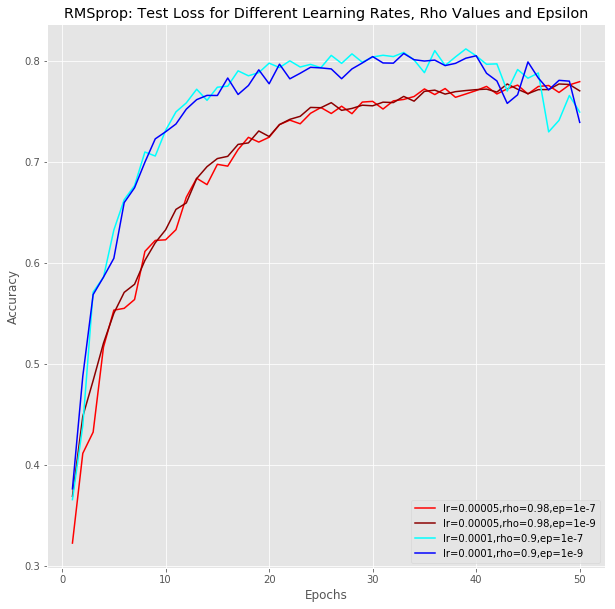

In [58]:
num = []
for i in range(50):
    num.append(i+1)
    
num = np.asarray(num)

#Plotting Testing Loss for Learning Rates (=0.0001 & 0.00005) vs. Rho

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("RMSprop: Test Loss for Different Learning Rates, Rho Values and Epsilon")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


plt.plot(num,np.array(ts_acc1).T,mfc='b',label="lr=0.00005,rho=0.98,ep=1e-7",color='r')
plt.plot(num,np.array(ts_acc3).T,mfc='b',label="lr=0.00005,rho=0.98,ep=1e-9",color='darkred')
plt.plot(num,np.array(ts_acc2).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-7",color='cyan')
plt.plot(num,np.array(ts_acc4).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-9",color='b')

plt.legend(loc="best")

plt.show()

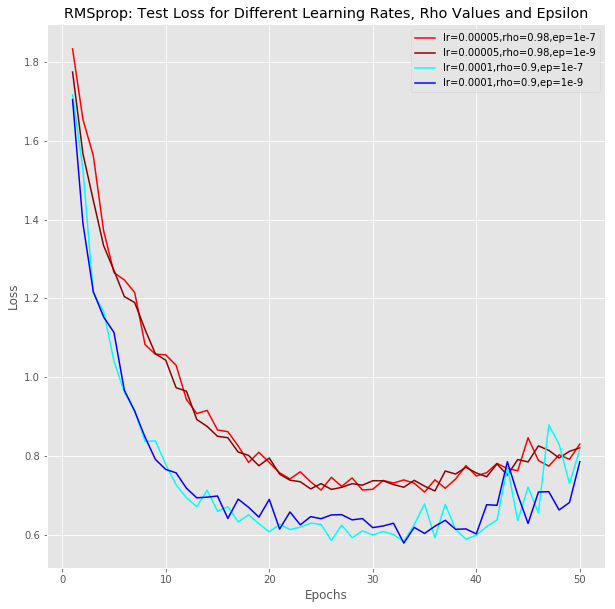

In [59]:
#Plotting Testing Loss for Learning Rates (=0.0001 & 0.00005) vs. Rho

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


plt.figure(figsize=(10,10))
plt.title("RMSprop: Test Loss for Different Learning Rates, Rho Values and Epsilon")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(num,np.array(ts_ls1).T,mfc='b',label="lr=0.00005,rho=0.98,ep=1e-7",color='r')
plt.plot(num,np.array(ts_ls3).T,mfc='b',label="lr=0.00005,rho=0.98,ep=1e-9",color='darkred')
plt.plot(num,np.array(ts_ls2).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-7",color='cyan')
plt.plot(num,np.array(ts_ls4).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-9",color='b')

plt.legend(loc="best")

plt.show()

In [69]:
lrate = 0.0001
rhovalue = 0.9
epsilonvalue = 1e-7
epochs = 100
decayvalue = 0.0001
tr_accf,ts_accf,tr_lsf,ts_lsf = RMSPropExperiment(lrate,rhovalue,epsilonvalue,epochs,X_train,y_train,X_test,y_test,decayvalue)



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s - loss: 1.8108 - acc: 0.3372 - val_loss: 1.7203 - val_acc: 0.3864
Epoch 2/100
50000/50000 [==============================] - 12s - loss: 1.5011 - acc: 0.4517 - val_loss: 1.4139 - val_acc: 0.4885
Epoch 3/100
50000/50000 [==============================] - 12s - loss: 1.3422 - acc: 0.5126 - val_loss: 1.2896 - val_acc: 0.5339
Epoch 4/100
50000/50000 [==============================] - 12s - loss: 1.2256 - acc: 0.5621 - val_loss: 1.1951 - val_acc: 0.5784
Epoch 5/100
50000/50000 [==============================] - 12s - loss: 1.1329 - acc: 0.5950 - val_loss: 1.1131 - val_acc: 0.5988
Epoch 6/100
50000/50000 [==============================] - 12s - loss: 1.0623 - acc: 0.6251 - val_loss: 1.0536 - val_acc: 0.6254
Epoch 7/100
50000/50000 [==============================] - 12s - loss: 1.0093 - acc: 0.6438 - val_loss: 0.9735 - val_acc: 0.6616
Epoch 8/100
50000/50000 [======================

50000/50000 [==============================] - 12s - loss: 0.4472 - acc: 0.8457 - val_loss: 0.6485 - val_acc: 0.7838
Epoch 64/100
50000/50000 [==============================] - 12s - loss: 0.4398 - acc: 0.8477 - val_loss: 0.6595 - val_acc: 0.7826
Epoch 65/100
50000/50000 [==============================] - 12s - loss: 0.4399 - acc: 0.8471 - val_loss: 0.6652 - val_acc: 0.7807
Epoch 66/100
50000/50000 [==============================] - 12s - loss: 0.4426 - acc: 0.8469 - val_loss: 0.6479 - val_acc: 0.7870
Epoch 67/100
50000/50000 [==============================] - 12s - loss: 0.4335 - acc: 0.8506 - val_loss: 0.6584 - val_acc: 0.7804
Epoch 68/100
50000/50000 [==============================] - 12s - loss: 0.4319 - acc: 0.8502 - val_loss: 0.6533 - val_acc: 0.7870
Epoch 69/100
50000/50000 [==============================] - 12s - loss: 0.4294 - acc: 0.8528 - val_loss: 0.6468 - val_acc: 0.7879
Epoch 70/100
50000/50000 [==============================] - 12s - loss: 0.4251 - acc: 0.8525 - val_loss

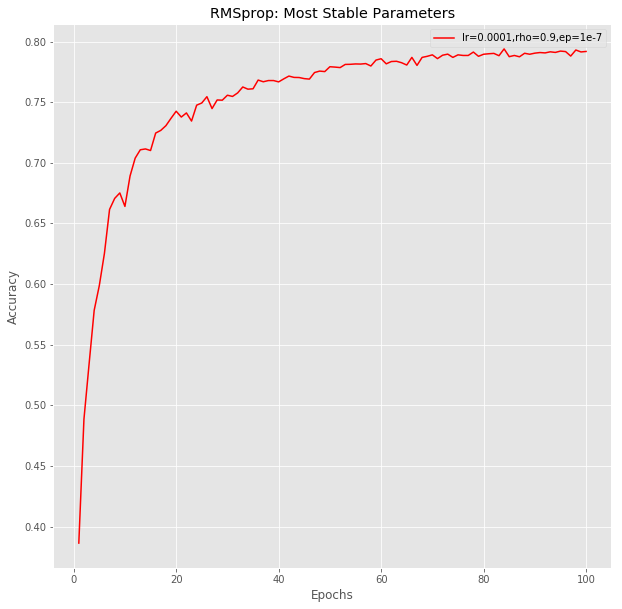

In [70]:
num = []
for i in range(100):
    num.append(i+1)
    
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
plt.title("RMSprop: Most Stable Parameters")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


plt.plot(num,np.array(ts_accf).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-7",color='r')

plt.legend(loc="best")

plt.show()

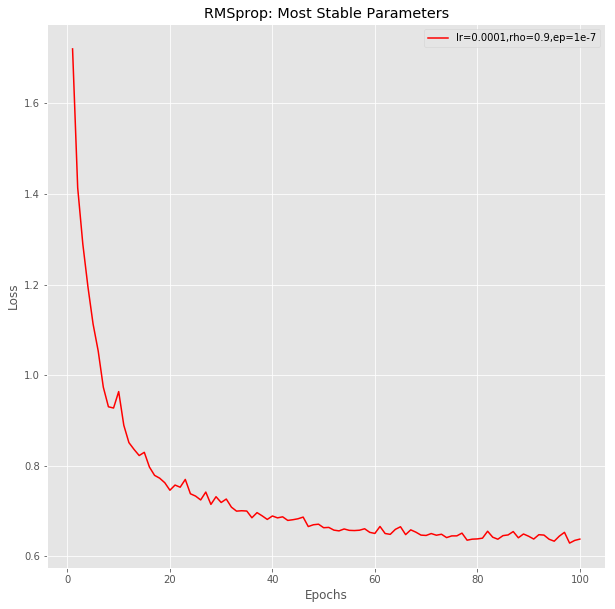

In [72]:
num = []
for i in range(100):
    num.append(i+1)
    
plt.style.use('ggplot')

plt.figure(figsize=(10,10))
plt.title("RMSprop: Most Stable Parameters")
plt.xlabel("Epochs")
plt.ylabel("Loss")


plt.plot(num,np.array(ts_lsf).T,mfc='b',label="lr=0.0001,rho=0.9,ep=1e-7",color='r')

plt.legend(loc="best")

plt.show()